# In this notebook, I will be analyzing a health insurance dataset using a linear regression model. The model will predict insurance charges (medical charges) based on different variables.

## **Variables**:

**Age** - This is the age of each insurance holder in years. It is a quantitative variable

**Sex** - The gender of the insurance holder (Can either be 'male' represented by 0 or 'female' represented by 1). This is a qualitative variable but encoded numerically.

**BMI** - This is the Body Mass Index which is a measure of body fat based on weight and height. This is a quantitative variable.

**Children** - This is the number of dependents covered by the insurance. It is a quantitative variable.

**Smoker** - This is the smoking status (Can either be 'yes' denoted by 1 or 'no' denoted by 0). It is a qualitative variable but encoded numerically.

**Region** - This is the region where the insurance holder resides in. (It can be 'northwest' denoted by 1, or 'northeast' denoted by 2, or 'southwest' denoted by 3, or 'southeast' denoted by 4). It is a categorical variable but encoded numerically.

**Charges** - This is the response variable and it is quantitative. It is the output we will receive after inserting the variables above as inputs to give us a prediction.









In [85]:
from google.colab import files
import pandas as pd

# Upload the dataset
uploaded = files.upload()

data = pd.read_csv('insurance.csv')

Saving insurance.csv to insurance (2).csv


In [86]:
# Display the first few rows of the dataset
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [87]:
# Check the data types and any missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [88]:
# Checking for missing values
data.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [89]:
# Check for any duplicate values
data[data.duplicated(keep = False)]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [90]:
# Drop one of the rows to remove duplication
data.drop_duplicates(inplace = True)

# Confirm there are no more duplications
data.duplicated().sum()

0

In [98]:
# Convert categorical variables - smoker, sex and region into numerical variables
num_data = {
    'sex': {'male': 0, 'female': 1},
    'smoker': {'yes': 1, 'no': 0},
    'region': {'northwest': 1, 'northeast': 2, 'southeast': 3, 'southwest': 4}
}

# Make a copy of the data with these new numerical changes and replace the categorical with numerical values
data_copy = data.copy()
data_copy.replace(num_data, inplace = True)
data_copy = data_copy.infer_objects(copy = False)

data_copy.head()

<ipython-input-98-c2df05f4802c>:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_copy.replace(num_data, inplace = True)


,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,4,16884.92400
1,18,0,33.770,1,0,3,1725.55230
2,28,0,33.000,3,0,3,4449.46200
3,33,0,22.705,0,0,1,21984.47061
4,32,0,28.880,0,0,1,3866.85520


In [99]:
# Statistical description of the data
data_copy.describe()

,age,sex,bmi,children,smoker,region,charges
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,0.495138,30.663452,1.095737,0.204936,2.516081,13279.121487
std,14.044333,0.500163,6.100468,1.205571,0.403806,1.105208,12110.359656
min,18.000000,0.000000,15.960000,0.000000,0.000000,1.000000,1121.873900
25%,27.000000,0.000000,26.290000,0.000000,0.000000,2.000000,4746.344000
50%,39.000000,0.000000,30.400000,1.000000,0.000000,3.000000,9386.161300
75%,51.000000,1.000000,34.700000,2.000000,0.000000,3.000000,16657.717450
max,64.000000,1.000000,53.130000,5.000000,1.000000,4.000000,63770.428010


I want to look at each variable's relationship to our response variable (charges) to determine distribution, visual representation, outliers, etc.

In [100]:
# Libraries for visualizing various distributions
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Correlation of the data features')

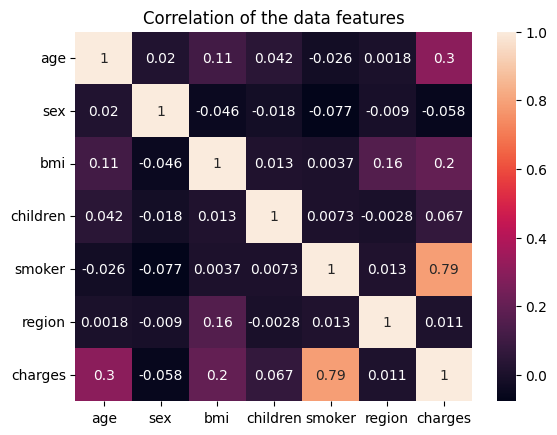

In [101]:
sns.heatmap(data_copy.corr(), annot = True)
plt.title('Correlation of the data features')

It is evident that Smoker, BMI and Age have a strong correlation to charges and therefore would term them as the most important factors in determining charges. On the other hand, sex, children and region have less correlation and therefore their effect to charges is less.

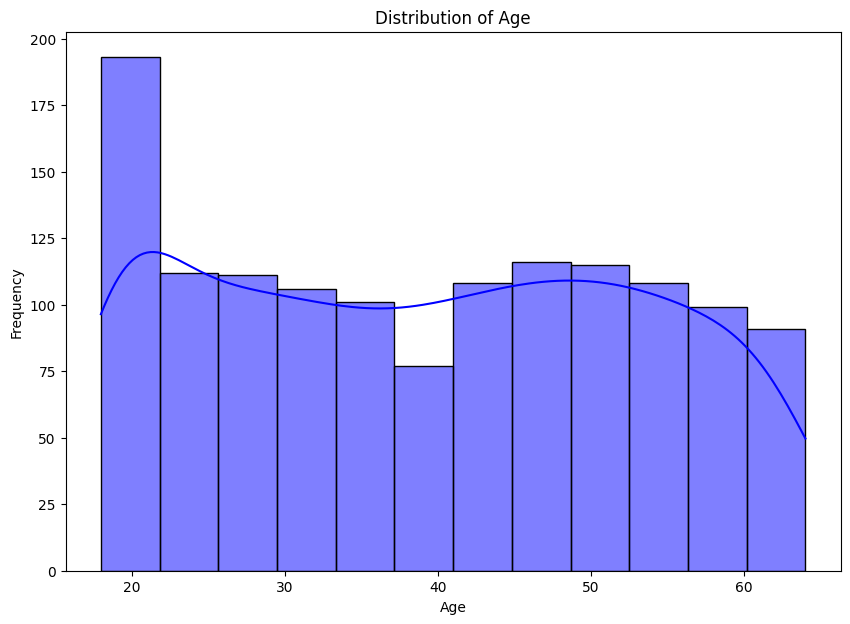

In [102]:
# Histogram for Age
plt.figure(figsize = (10, 7))
sns.histplot(data_copy['age'], kde = True, color = 'blue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

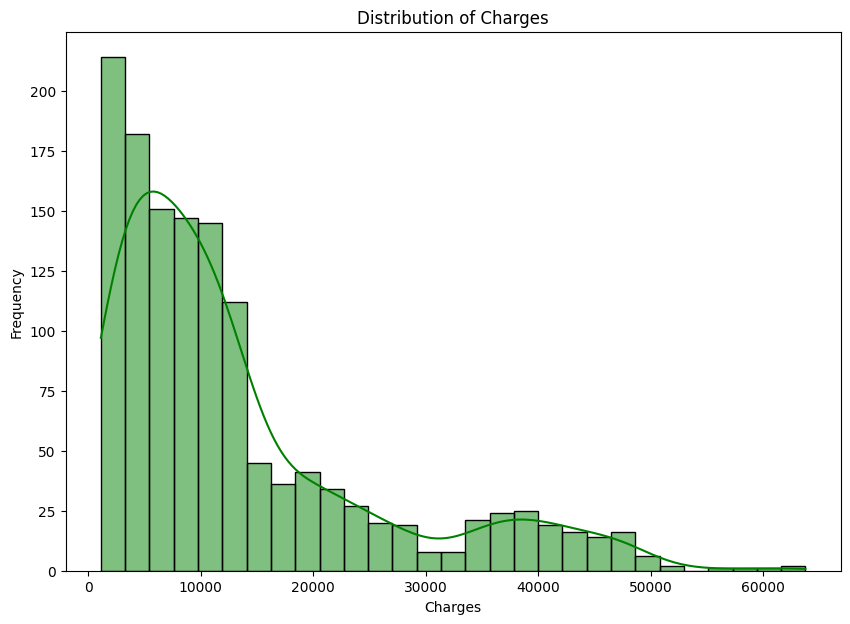

In [103]:
# Histogram for Charges
plt.figure(figsize = (10, 7))
sns.histplot(data_copy['charges'], kde = True, color = 'green')
plt.title('Distribution of Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

The graph for charges is rightly skewed with a possibility of outliers.

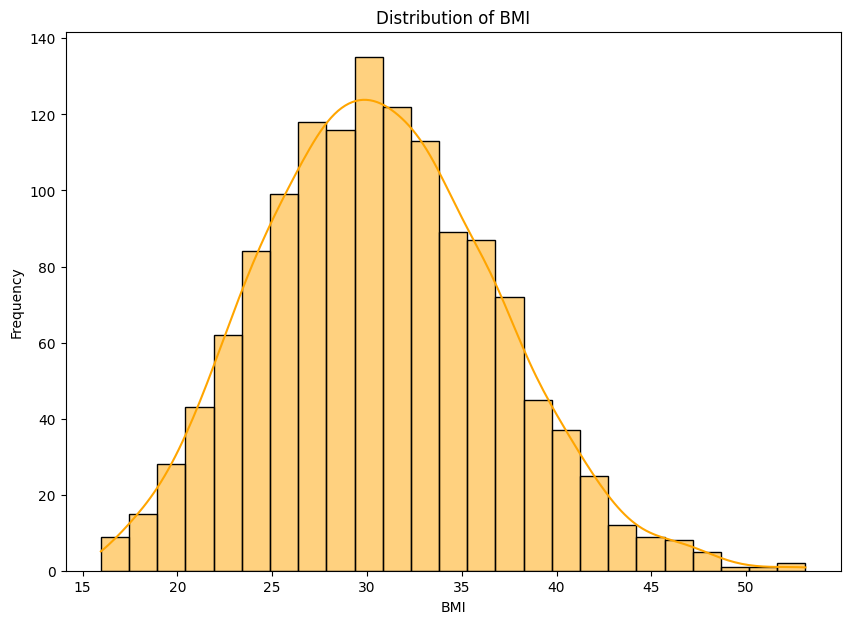

In [104]:
# Histogram for BMI
plt.figure(figsize = (10, 7))
sns.histplot(data_copy['bmi'], kde = True, color = 'orange')
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

BMI graph shows a uniform distribution

In [105]:
# Calculation of IQR to sort the outliers in Charges
Q1 = data_copy['charges'].quantile(0.25)
Q3 = data_copy['charges'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


# Identify the outliers
outliers = data_copy[(data_copy['charges'] < lower_bound) | (data_copy['charges'] > upper_bound)]
print(outliers)

      age  sex     bmi  children  smoker  region      charges
14     27    0  42.130         0       1       3  39611.75770
19     30    0  35.300         0       1       4  36837.46700
23     34    1  31.920         1       1       2  37701.87680
29     31    0  36.300         2       1       4  38711.00000
30     22    0  35.600         0       1       4  35585.57600
...   ...  ...     ...       ...     ...     ...          ...
1300   45    0  30.360         0       1       3  62592.87309
1301   62    0  30.875         3       1       1  46718.16325
1303   43    0  27.800         0       1       4  37829.72420
1313   19    1  34.700         2       1       4  36397.57600
1323   42    1  40.370         2       1       3  43896.37630

[139 rows x 7 columns]


In [106]:
# Filter the data to keep only the values within bounds
data_clean = data_copy[(data_copy['charges'] >= lower_bound) & (data_copy['charges'] <= upper_bound)]

# Display cleaned data
print(f"Original data shape: {data_copy.shape}")
print(f"Cleaned data shape: {data_clean.shape}")

data_clean.head()

Original data shape: (1337, 7)
Cleaned data shape: (1198, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,4,16884.92400
1,18,0,33.770,1,0,3,1725.55230
2,28,0,33.000,3,0,3,4449.46200
3,33,0,22.705,0,0,1,21984.47061
4,32,0,28.880,0,0,1,3866.85520


In [107]:
# Standardize the variable - charges
from sklearn.preprocessing import StandardScaler

features_to_scale = ['charges']
scaler = StandardScaler()
data_copy[features_to_scale] = scaler.fit_transform(data_copy[features_to_scale])

data_copy.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,4,0.297857
1,18,0,33.770,1,0,3,-0.954381
2,28,0,33.000,3,0,3,-0.729373
3,33,0,22.705,0,0,1,0.719104
4,32,0,28.880,0,0,1,-0.777499


In [108]:
from sklearn.model_selection import train_test_split

# Define features and target variables
X = data_copy.drop('charges', axis = 1)
y = data_copy['charges']  # The target variable (charges)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(f"Training data shape: {X_train.shape}, {y_train.shape}")
print(f"Testing data shape: {X_test.shape}, {y_test.shape}")

Training data shape: (1069, 6), (1069,)
Testing data shape: (268, 6), (268,)


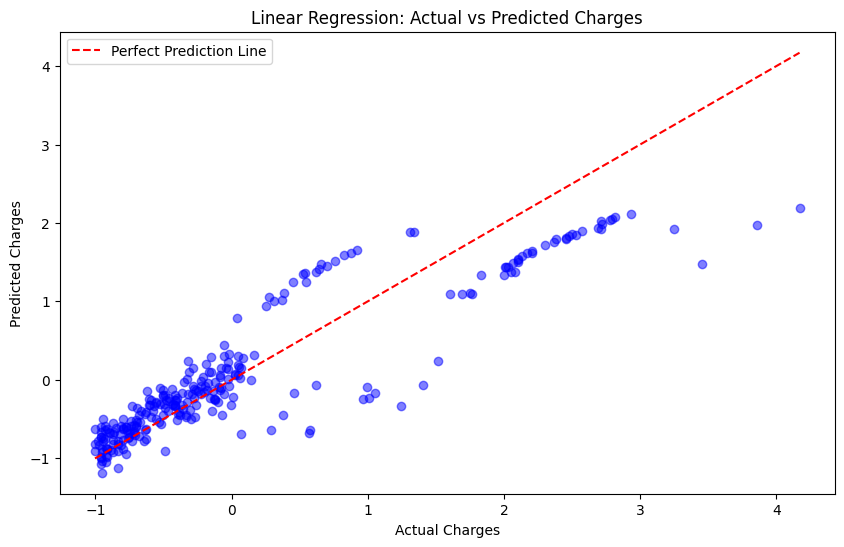

In [124]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Create and fit the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_linear = linear_model.predict(X_test)

# Create a scatter plot of actual vs predicted charges
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_linear, color='blue', alpha=0.5)

# Plot the line of equality (y = x) to show perfect predictions
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction Line')

# Add labels and title
plt.title('Linear Regression: Actual vs Predicted Charges')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.legend()

# Show the plot
plt.show()


In [ ]:
# Evaluate the linear model using Mean Squared Error (MSE)
mse_linear = mean_squared_error(y_test, y_pred_linear)

# Calculate Root Mean Squared Error (RMSE)
rmse_linear = np.sqrt(mse_linear)

# Calculate R² Score
r2_linear = r2_score(y_test, y_pred_linear)

# Print the evaluation metrics
print(f'Linear Regression Mean Squared Error (MSE): {mse_linear}')
print(f'Linear Regression Root Mean Squared Error (RMSE): {rmse_linear}')
print(f'Linear Regression R² Score: {r2_linear}')

In [111]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Decision Tree Model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
print(f'Decision Tree Mean Squared Error: {mse_dt}')

# Random Forest Model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f'Random Forest Mean Squared Error: {mse_rf}')

Decision Tree Mean Squared Error: 0.2616916318522083
Random Forest Mean Squared Error: 0.14821076189092766


In [114]:
# Compare MSE results between linear regression, decision tree and random forest models
print(f'Linear Regression MSE: {mse_linear}')
print(f'Decision Tree MSE: {mse_dt}')
print(f'Random Forest MSE: {mse_rf}')

Linear Regression MSE: 0.24312189704449536
Decision Tree MSE: 0.2616916318522083
Random Forest MSE: 0.14821076189092766


In [112]:
import joblib

# Save the best performing model which is Random Forest
joblib.dump(rf_model, 'best_random_forest_model.pkl')

print("Model saved as 'best_random_forest_model.pkl'")

Model saved as 'best_random_forest_model.pkl'


In [113]:
from google.colab import files

# Download the model file
files.download('best_random_forest_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [116]:
# Svae the charges scaler
joblib.dump(scaler, 'charges_scaler.pkl')
print("Scaler saved as 'charges_scaler.pkl'")

Scaler saved as 'charges_scaler.pkl'


In [117]:
# Download the charges scaler file
files.download('charges_scaler.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [122]:
import joblib
import pandas as pd

# Load the trained Random Forest model and the scaler used for 'charges'
rf_model = joblib.load('best_random_forest_model.pkl')
scaler = joblib.load('charges_scaler.pkl')

# Define a function to preprocess the input data
def preprocess_input(input_data):
    # Map categorical features to numeric values
    num_data = {
        'sex': {'male': 0, 'female': 1},
        'smoker': {'yes': 1, 'no': 0},
        'region': {'northwest': 1, 'northeast': 2, 'southeast': 3, 'southwest': 4}
    }

    # Replace categorical features with numeric values
    input_data = input_data.replace(num_data)

    # Drop 'charges' column because it's not part of input features
    input_data = input_data.drop('charges', axis = 1, errors = 'ignore')

    return input_data

# Example input
input_data = pd.DataFrame({
    'age': [30],
    'sex': ['female'],
    'bmi': [25.0],
    'children': [2],
    'smoker': ['no'],
    'region': ['southeast']
})

processed_input = preprocess_input(input_data)

# Make a prediction using the Random Forest model
predicted_charge = rf_model.predict(processed_input)

# Inverse standardize the 'charges' prediction to get the original scale
try:
    predicted_charge_original = scaler.inverse_transform(predicted_charge.reshape(-1, 1))
    print(f"Predicted insurance charge (original scale): {predicted_charge_original[0][0]}")
except Exception as e:
    print(f"Error during inverse transformation: {e}")

Predicted insurance charge (original scale): 6437.902396300002
